In [1]:
%matplotlib inline
import numpy as np
import pystan
import matplotlib.pylab as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams["figure.figsize"] = (20,6)

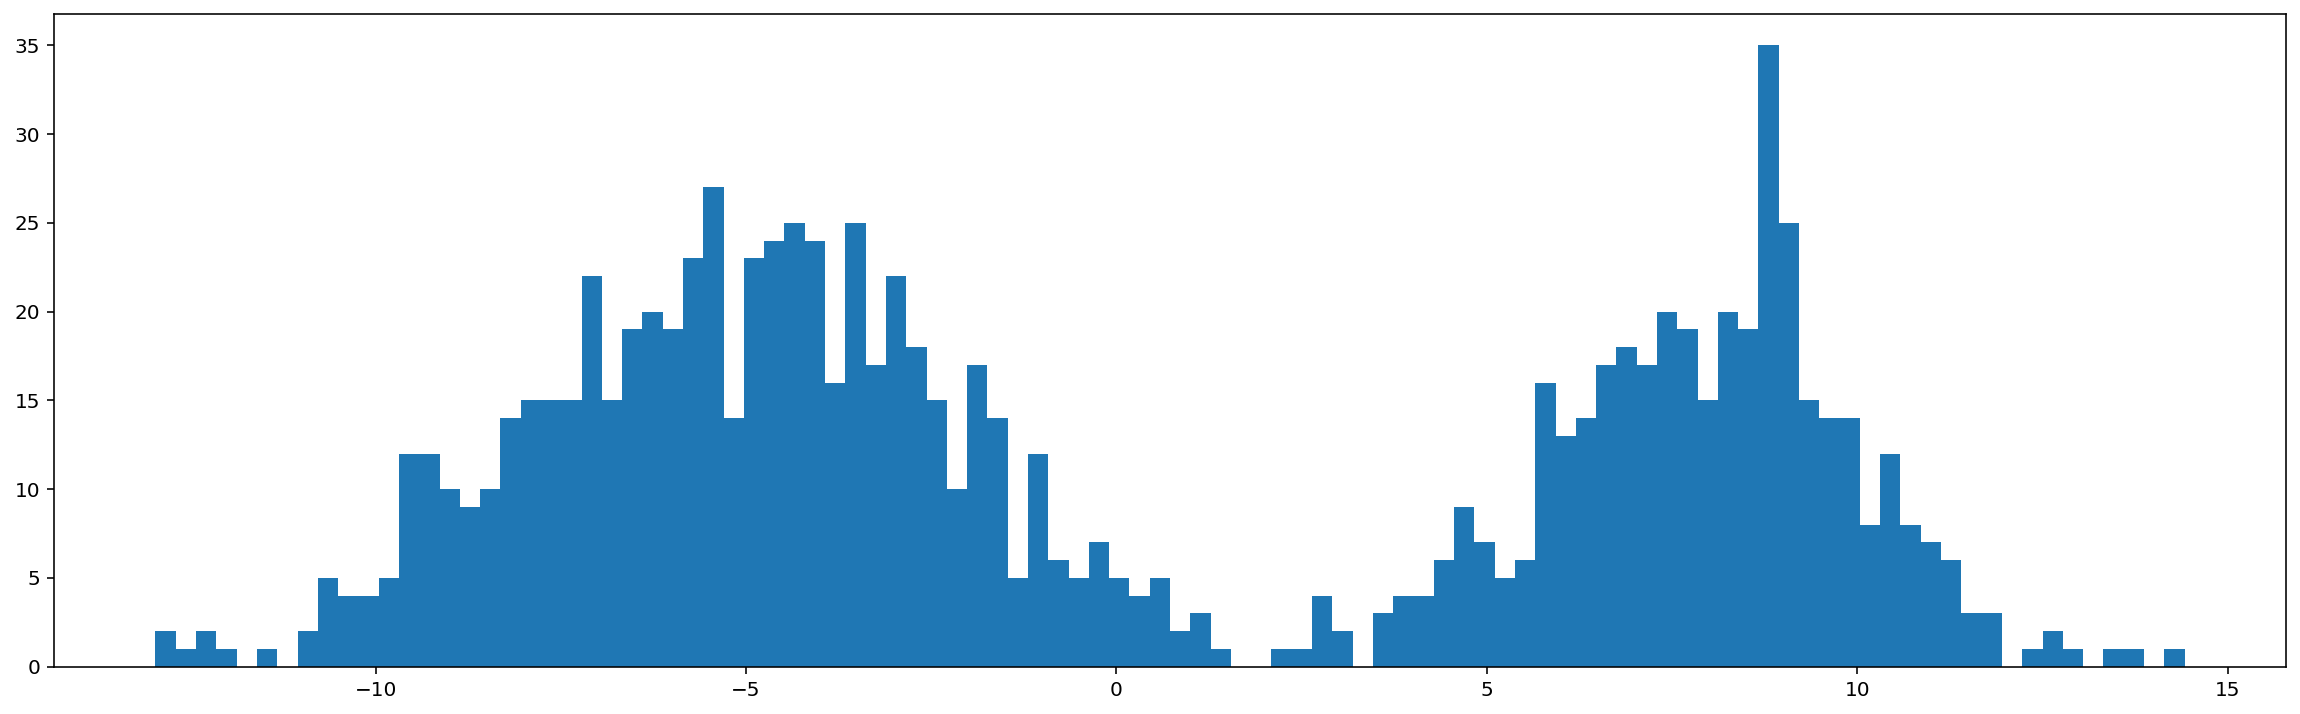

In [4]:
mu0 = np.asarray([-5, 8])
sigma0 = np.asarray([3, 2])
lam = 0.4

N = 1000
z = np.random.binomial(1, lam, size=(N,))
y = np.random.normal(loc=mu0[z], scale=sigma0[z])

plt.hist(y, 100);

## θ ~ Beta(5, 5)

In [5]:
model = """
data {
 int<lower = 0> N;
 vector[N] y;
}

parameters {
  ordered[2] mu;
  real<lower=0> sigma[2];
  real<lower=0, upper=1> theta;
}

model {
 sigma ~ normal(0, 2);
 mu ~ normal(0, 2);
 theta ~ beta(5, 5);
 for (n in 1:N)
   target += log_mix(theta,
                     normal_lpdf(y[n] | mu[1], sigma[1]),
                     normal_lpdf(y[n] | mu[2], sigma[2]));
}
"""
sm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4a1a8842066ad04ed5bb50ec34a6de05 NOW.


Inference for Stan model: anon_model_4a1a8842066ad04ed5bb50ec34a6de05.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[1]     -5.03  3.2e-3   0.12  -5.25  -5.11  -5.03  -4.95  -4.77   1422    1.0
mu[2]      7.93  2.0e-3    0.1   7.72   7.86   7.93    8.0   8.13   2699    1.0
sigma[1]   2.84  2.1e-3   0.09   2.67   2.78   2.84    2.9   3.03   1726    1.0
sigma[2]   2.03  1.7e-3   0.08   1.87   1.97   2.02   2.08    2.2   2187    1.0
theta      0.61  3.2e-4   0.02   0.57   0.59   0.61   0.62   0.64   2348    1.0
lp__      -3005    0.06   1.65  -3009  -3006  -3005  -3004  -3003    873    1.0

Samples were drawn using NUTS at Fri Jun 28 15:40:07 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


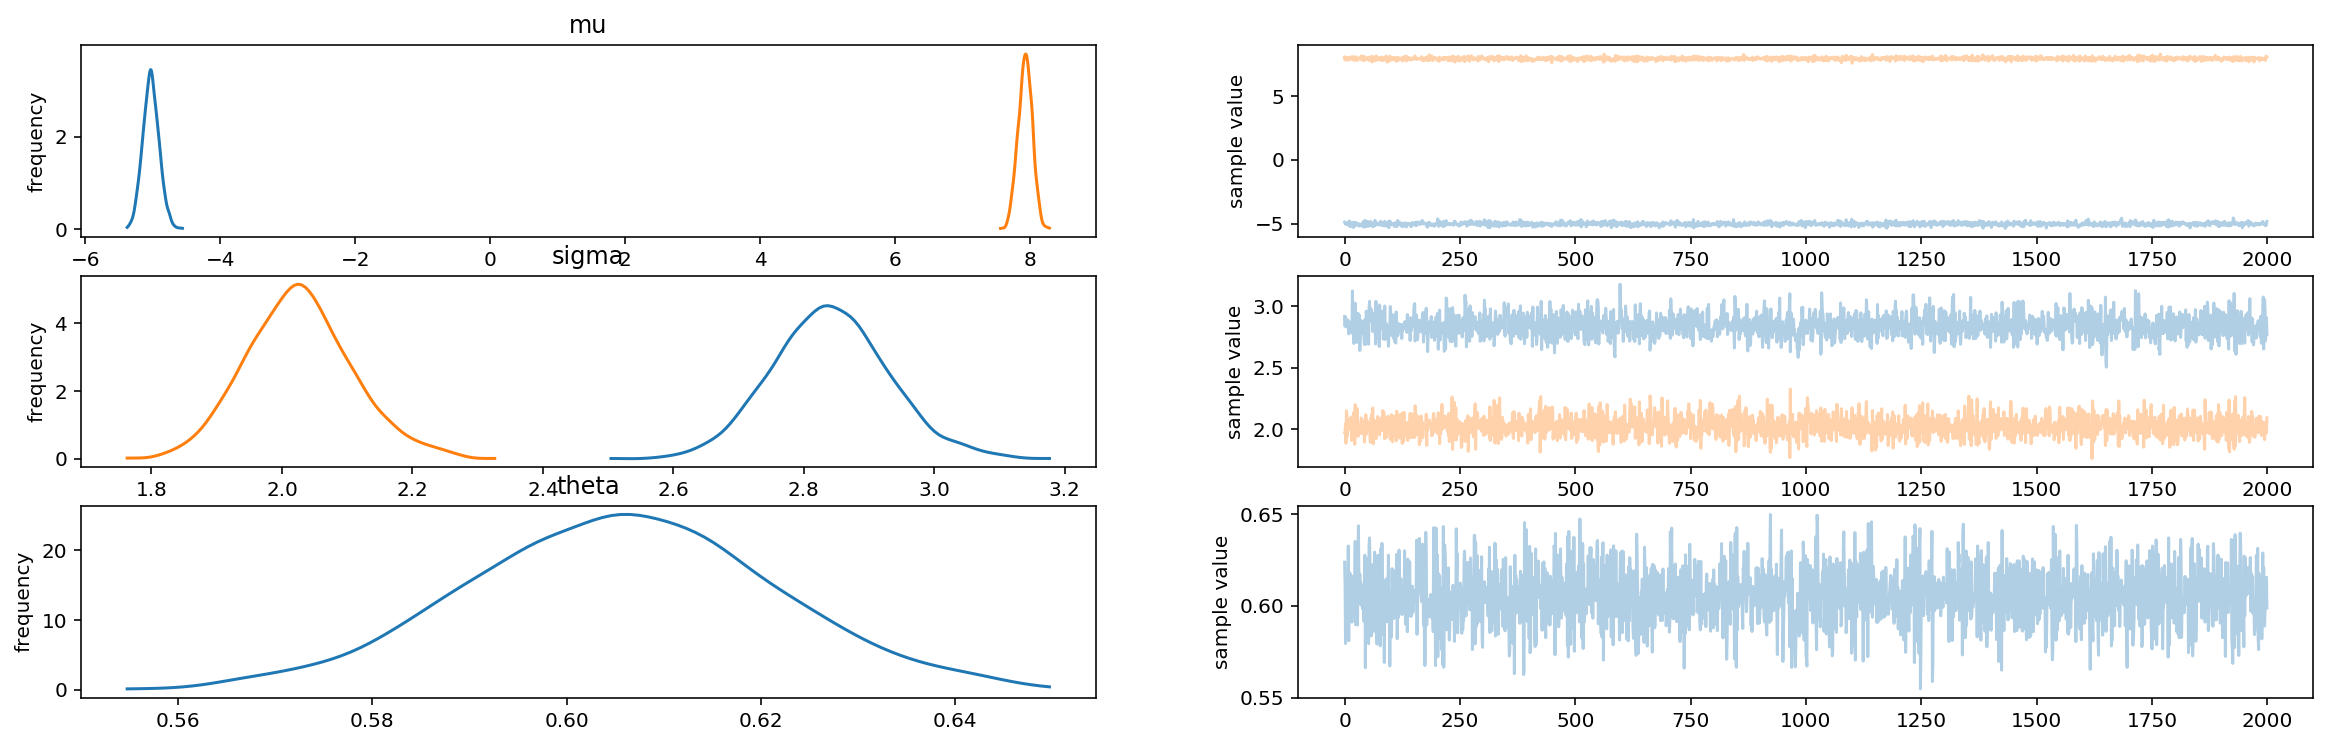

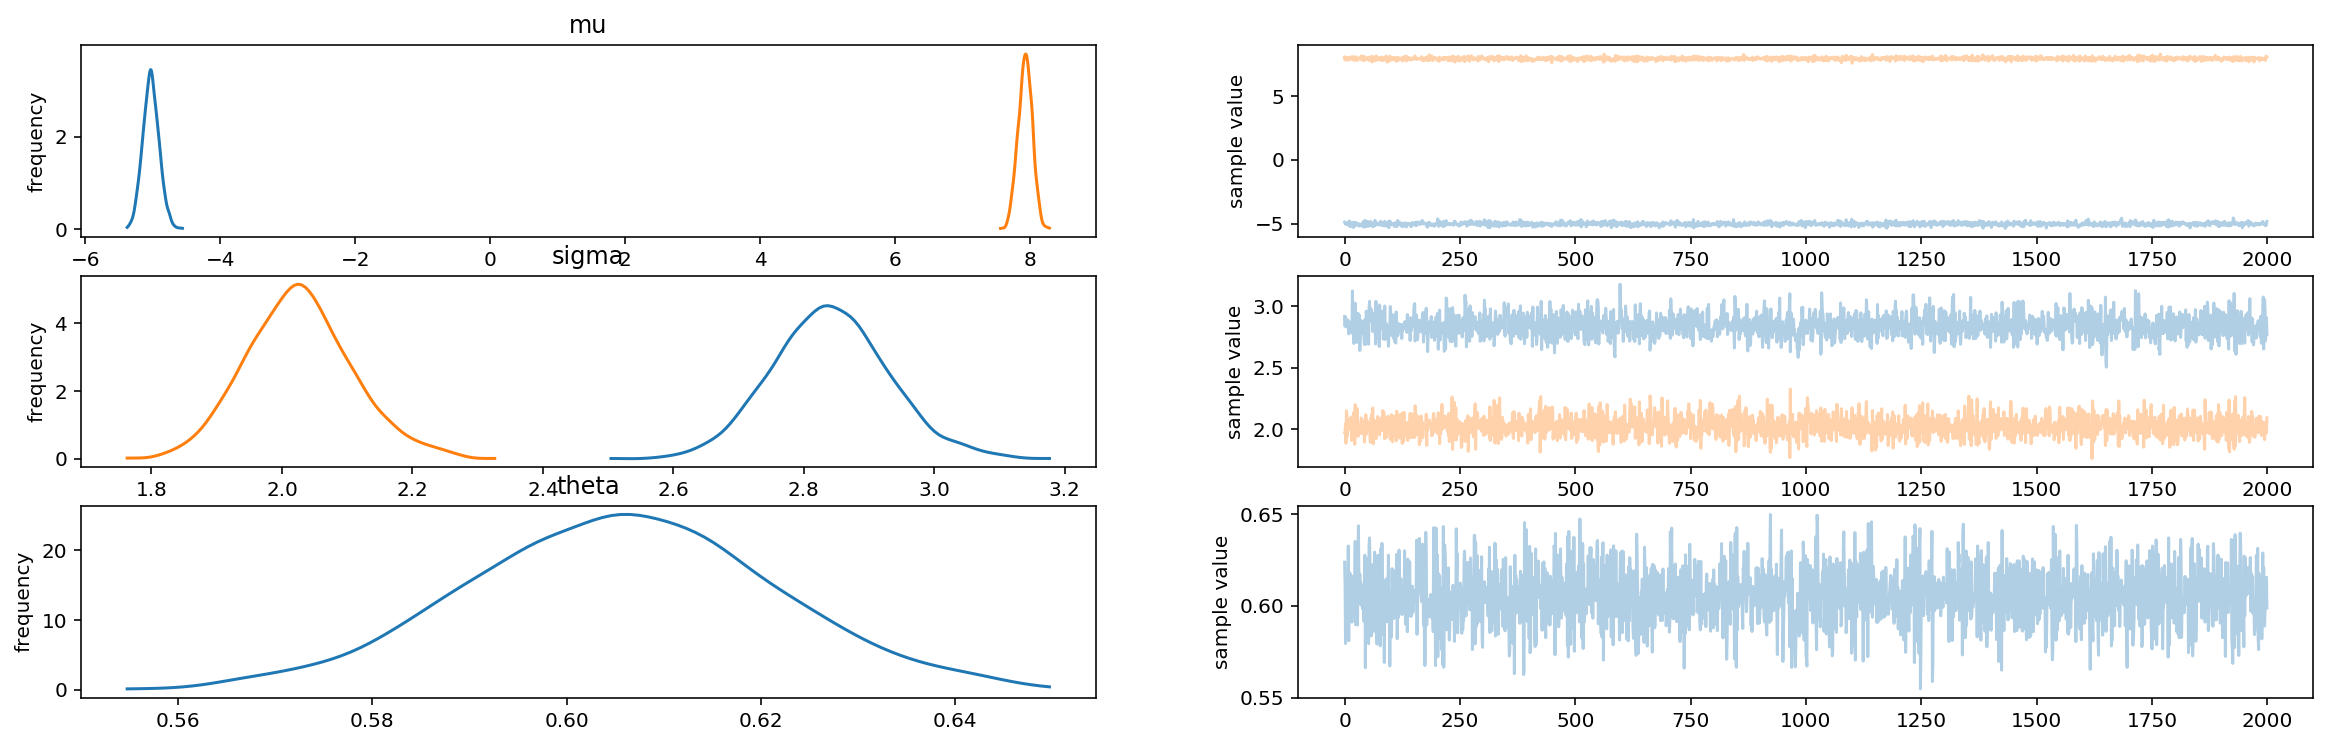

In [6]:
fit = sm.sampling(data=dict(N=len(y), y=y), iter=1000, chains=4)

print(fit)

# if matplotlib is installed (optional, not required), a visual summary and
# traceplot are available
fit.plot()

## θ ~ Dirichlet([5, 5])

http://modernstatisticalworkflow.blogspot.com/2016/10/finite-mixture-models-in-stan.html
https://ecosang.github.io/blog/study/dirichlet-process-with-stan/

In [7]:
model = """
data {
    int<lower = 0> N;
    vector[N] y;
}

parameters {
    ordered[2] mu;
    real<lower=0> sigma[2];
    simplex[2] theta;
}

model {
    sigma ~ normal(0, 2);
    mu ~ normal(0, 2);
    theta ~ dirichlet(rep_vector(2.0, 2));

    // likelihood
    for(i in 1:N) {
        vector[2] contributions;
        for(k in 1:2) {
            contributions[k] = log(theta[k]) + normal_lpdf(y[i] | mu[k], sigma[k]);
        }
        target += log_sum_exp(contributions);
    }
}
"""
sm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_869aa21d755cb5bb6c3d030321495852 NOW.


Inference for Stan model: anon_model_869aa21d755cb5bb6c3d030321495852.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[1]     -5.04  3.0e-3   0.12  -5.26  -5.12  -5.04  -4.96  -4.81   1557    1.0
mu[2]      7.93  2.1e-3   0.11   7.73   7.85   7.93    8.0   8.13   2523    1.0
sigma[1]   2.84  2.1e-3   0.09   2.66   2.78   2.84    2.9   3.04   2016    1.0
sigma[2]   2.03  1.7e-3   0.08   1.87   1.97   2.03   2.08   2.19   2159    1.0
theta[1]   0.61  3.2e-4   0.02   0.58    0.6   0.61   0.62   0.64   2376    1.0
theta[2]   0.39  3.2e-4   0.02   0.36   0.38   0.39    0.4   0.42   2376    1.0
lp__      -3001    0.06   1.66  -3005  -3002  -3000  -2999  -2999    850    1.0

Samples were drawn using NUTS at Fri Jun 28 15:41:23 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction 

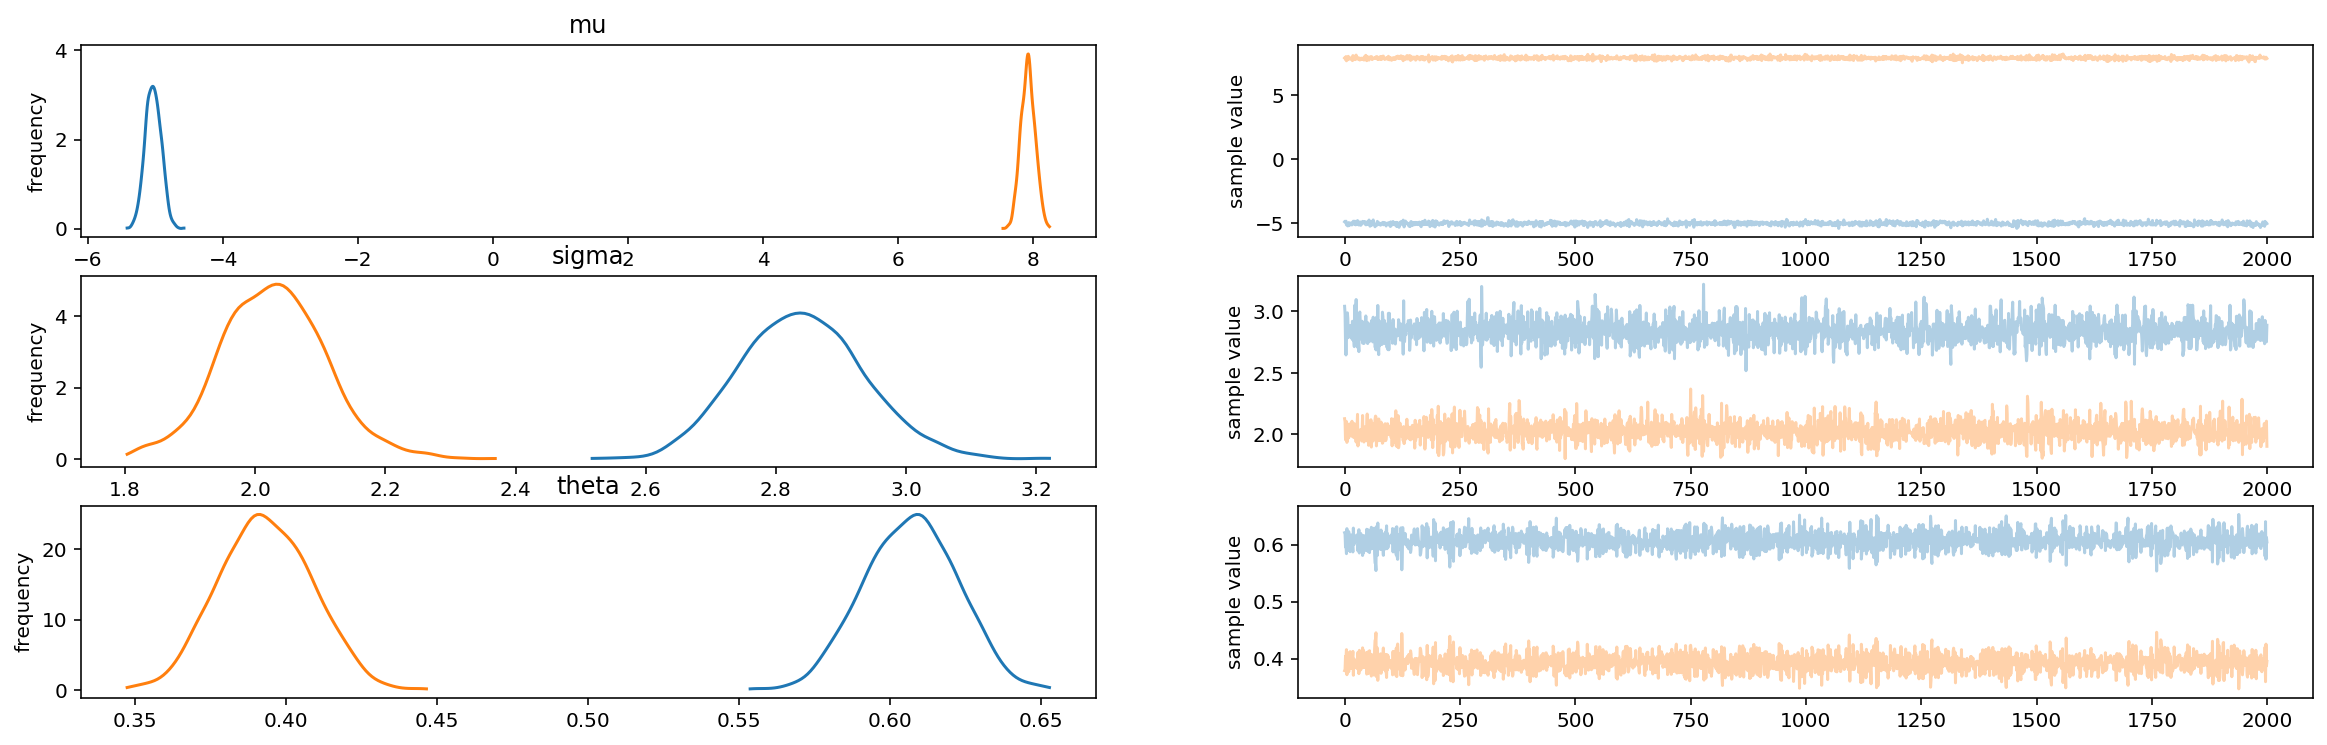

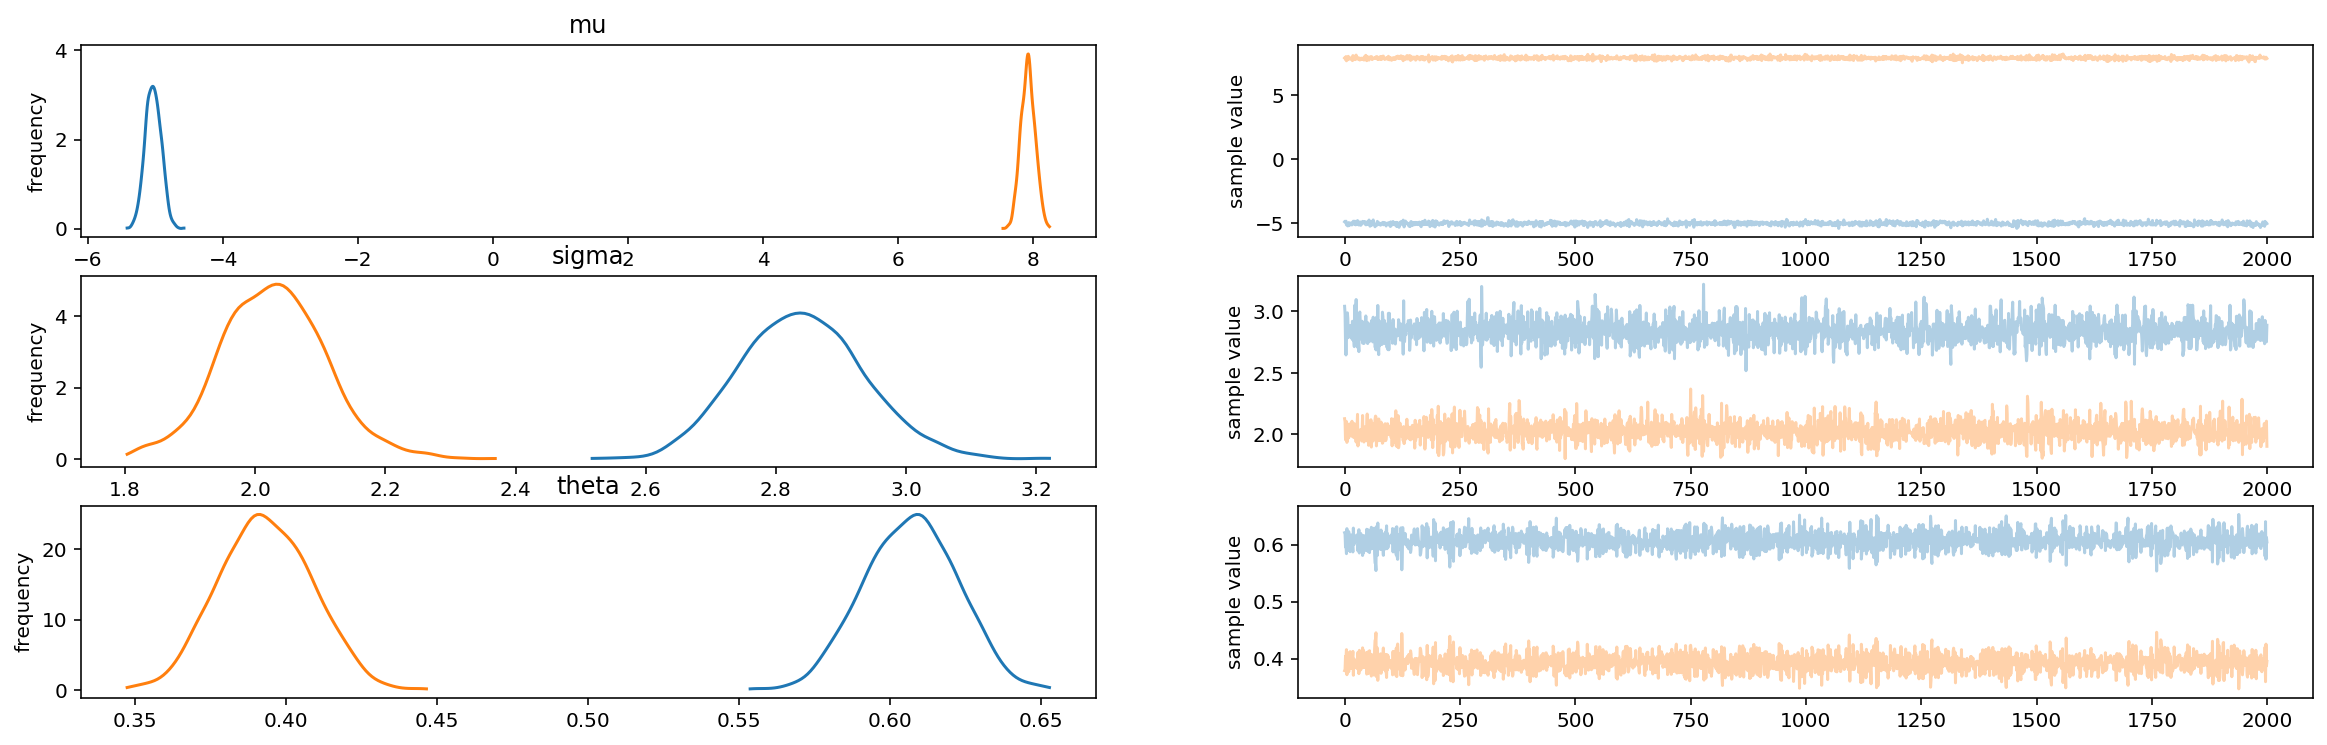

In [8]:
fit = sm.sampling(data=dict(N=len(y), y=y), iter=1000, chains=4)

print(fit)

# if matplotlib is installed (optional, not required), a visual summary and
# traceplot are available
fit.plot()